# Lab Assignment 7 - Submitted By : Vishav Gupta [102497018]

## Q.1 You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a `Jupyter Notebook (.ipynb)` with:
 - Well-documented code and clear comments.
 - Markdown explanations for each step.
 - Screenshots of the plots and outputs.

### **Part I: Randomized Sales Data Generation (NumPy)**
1. Initialize Random Seed
2. Generate Sales Data
 - Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 - Electronics, Clothing, Home & Kitchen, Sports.
 - Sales values should be between 1000 and 5000 units per month.
 - The range should be randomized using the seed.
3. Convert to DataFrame
 - Convert the cleaned NumPy array into a Pandas DataFrame with:
  i. Columns: Electronics, Clothing, Home & Kitchen, Sports
  ii. Index: Months from Jan to Dec

In [2]:
import numpy as np
import pandas as pd

roll_number = 102497018
np.random.seed(roll_number)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

sales_data = np.random.randint(1000, 5001, size=(12, 4))

sales_df = pd.DataFrame(sales_data, columns=categories, index=months)

print(sales_df)
sales_df.shape

     Electronics  Clothing  Home & Kitchen  Sports
Jan         3815      1398            4611    4907
Feb         4925      3263            3909    2044
Mar         4837      4129            3154    4227
Apr         1575      2358            3221    1502
May         1093      1082            4825    1338
Jun         1505      1301            2127    2735
Jul         3341      2552            3366    1173
Aug         3023      2623            3528    4867
Sep         3508      4432            2150    4505
Oct         1207      2324            2247    1887
Nov         3884      4114            3006    2287
Dec         3711      3532            3386    3632


(12, 4)

### **Part II: Data Manipulation and Analysis (Pandas)**
1. Display the first 5 rows and summary statistics of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 -Total Sales: Sum of all categories per month.
 - Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 - If your roll number is even, apply a 10% discount to the Electronics category.

 - If odd, apply a 15% discount to the Clothing category.

In [ ]:
print(sales_df.head())
print(sales_df.describe())

category_totals = sales_df.sum()
monthly_totals = sales_df.sum(axis=1)

growth_rates = sales_df.pct_change().mean()

sales_df["Total Sales"] = monthly_totals
sales_df["Growth Rate"] = sales_df["Total Sales"].pct_change() * 100

roll_number = int(input("Enter your roll number: "))
if roll_number % 2 == 0:
    sales_df["Electronics"] *= 0.9
else:
    sales_df["Clothing"] *= 0.85

print(sales_df)

     Electronics  Clothing  Home & Kitchen  Sports
Jan         3815      1398            4611    4907
Feb         4925      3263            3909    2044
Mar         4837      4129            3154    4227
Apr         1575      2358            3221    1502
May         1093      1082            4825    1338
       Electronics    Clothing  Home & Kitchen       Sports
count    12.000000    12.00000       12.000000    12.000000
mean   3035.333333  2759.00000     3294.166667  2925.333333
std    1365.431556  1150.69876      873.851749  1423.851712
min    1093.000000  1082.00000     2127.000000  1173.000000
25%    1557.500000  2092.50000     2816.250000  1790.750000
50%    3424.500000  2587.50000     3293.500000  2511.000000
75%    3832.250000  3677.50000     3623.250000  4296.500000
max    4925.000000  4432.00000     4825.000000  4907.000000
Enter your roll number: 102497018
     Electronics  Clothing  Home & Kitchen  Sports  Total Sales  Growth Rate
Jan       3433.5      1398            4611 

### **Part III: Visualizations (Matplotlib and Seaborn)**
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 - Box plots to show the sales distribuƟon for each category.

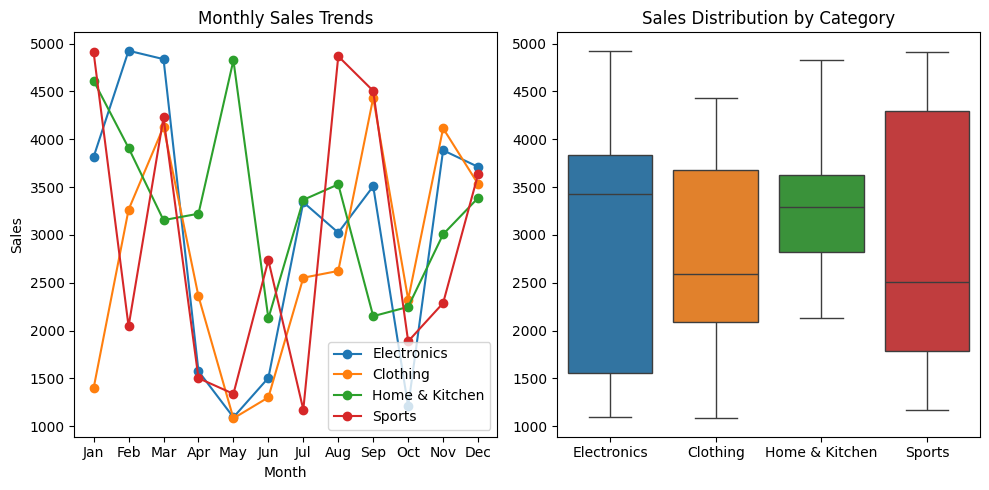

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for category in categories:
    axes[0].plot(sales_df.index, sales_df[category], marker='o', label=category)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].set_title('Monthly Sales Trends')
axes[0].legend()

sns.boxplot(data=sales_df[categories], ax=axes[1])
axes[1].set_title('Sales Distribution by Category')

plt.tight_layout()
plt.show()

## Q.2 For the array: `array = np.array([[1, -2, 3],[-4, 5, -6]])`
  1. Find element-wise absolute value
  2. Find the 25th, 50th, and 75th percentile of flateened array, for each column, for each
row.
  3. Mean, Median and Standard Deviation of flatened array, of each column, and
each row

In [11]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Element-wise absolute value
abs_array = np.abs(array)
print("Element-wise Absolute Value:\n", abs_array)

# ii. 25th, 50th, and 75th percentiles
percentiles_flat = np.percentile(array, [25, 50, 75])
percentiles_col = np.percentile(array, [25, 50, 75], axis=0)
percentiles_row = np.percentile(array, [25, 50, 75], axis=1)

print("Percentiles of Flattened Array:", percentiles_flat)
print("Percentiles per Column:\n", percentiles_col)
print("Percentiles per Row:\n", percentiles_row)

# iii. Mean, Median, and Standard Deviation
mean_flat = np.mean(array)
median_flat = np.median(array)
std_flat = np.std(array)

mean_col = np.mean(array, axis=0)
median_col = np.median(array, axis=0)
std_col = np.std(array, axis=0)

mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)

print("Mean, Median, Std Dev of Flattened Array:", mean_flat, median_flat, std_flat)
print("Mean, Median, Std Dev per Column:\n", mean_col, median_col, std_col)
print("Mean, Median, Std Dev per Row:\n", mean_row, median_row, std_row)

Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]
Percentiles of Flattened Array: [-3.5 -0.5  2.5]
Percentiles per Column:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Percentiles per Row:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]
Mean, Median, Std Dev of Flattened Array: -0.5 -0.5 3.8622100754188224
Mean, Median, Std Dev per Column:
 [-1.5  1.5 -1.5] [-1.5  1.5 -1.5] [2.5 3.5 4.5]
Mean, Median, Std Dev per Row:
 [ 0.66666667 -1.66666667] [ 1. -4.] [2.05480467 4.78423336]


## Q.3 For the array: `a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])`.
1. Find floor, ceiling and truncated value, rounded values

In [12]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)
rounded_values = np.round(a)

print("Floor Values:", floor_values)
print("Ceiling Values:", ceiling_values)
print("Truncated Values:", truncated_values)
print("Rounded Values:", rounded_values)

Floor Values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling Values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated Values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded Values: [-2. -2. -0.  0.  2.  2.  3.]


## Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [13]:
def swap_list_elements(lst, idx1, idx2):
    temp = lst[idx1]
    lst[idx1] = lst[idx2]
    lst[idx2] = temp
    return lst

list_example = [1, 2, 3, 4, 5]
swapped_list = swap_list_elements(list_example, 1, 3)
print("Swapped List:", swapped_list)

Swapped List: [1, 4, 3, 2, 5]


## Q.5 Write a Python program to swap two elements in a set by converting it to a list first.

In [14]:
def swap_set_elements(s, elem1, elem2):
    lst = list(s)
    idx1, idx2 = lst.index(elem1), lst.index(elem2)
    lst[idx1], lst[idx2] = lst[idx2], lst[idx1]
    return set(lst)

set_example = {10, 20, 30, 40, 50}
swapped_set = swap_set_elements(set_example, 20, 40)
print("Swapped Set:", swapped_set)

Swapped Set: {40, 10, 50, 20, 30}
